# **Construindo um Modelo com Tensorflow -  🐶 🐱!**

**Problema: uma imagem, dizer se é um dog ou um cat.**

Computer Vision; Deep Learning; Machine Learning; Artificial Inteligence! Nada disso faz sentido sem dados, muitos dados (Big Data! 🚀). Para isso, teremos:

* **Treinamento**: 25.000 imagens nomeadas: 12.500 de dogs e 12.500 de cats.
* **Teste**: 1.000 imagens de dogs e cats.

Usa-se os dados de treino para treinar o algoritmo e então criar o modelo preditivo. Usa-se os dados de teste para confirmar o desempenho do modelo preditivo já treinado, ou seja, apresenta-se ao modelo preditivo dados que ele não viu durante o treinamento, a fim de garantir que ele seja capaz de fazer previsões.

Por fim, o modelo de duas camadas de convolução seguidas de pooling, a camada de flattening, e as camadas totalmente conectadas (Dense), com a função de ativação sigmoid para a saída binária.

**Não há mágica. Há matemática!** 🧙

Fonte de dados

O Kaggle oferece diversos datasets públicos que podem ser usados para você desenvolver seus projetos e incluir no seu portfólio, uma excelente forma de demonstrar suas habilidades em Data Science e Machine Learning. Usaremos como fonte de dados, o famoso ([dataset Dogs and Cats.])https://www.kaggle.com/c/dogs-vs-cats/data

In [84]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dropout, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
from IPython.display import Image

**Carregando os dados de Treino e Teste**

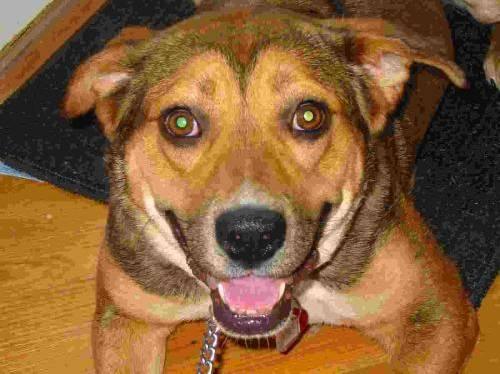

In [85]:
# Do dataset de treino, carregue uma imagem de cachorro
from IPython.display import Image

Image(filename='/content/drive/MyDrive/Colab Notebooks/Aula09/dataset_treino/dogs/dog.99.jpg')

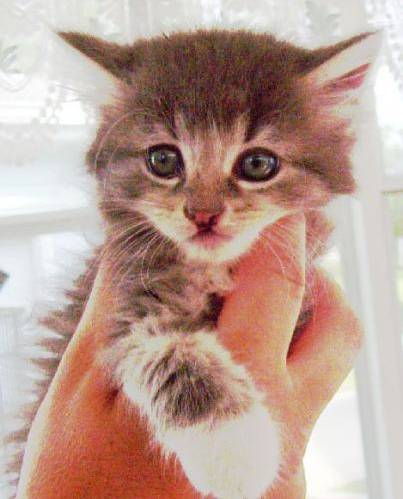

In [86]:
# Do dataset de treino, carregue uma imagem de gato
from IPython.display import Image
Image(filename='/content/drive/MyDrive/Colab Notebooks/Aula09/dataset_treino/cats/cat.100.jpg')

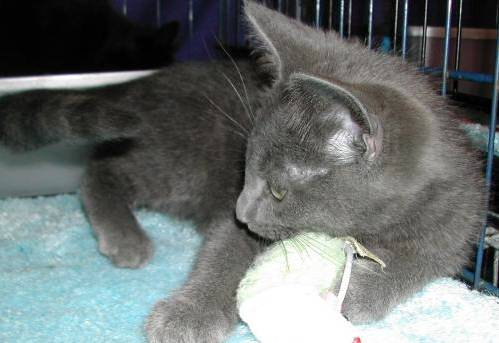

In [87]:
# Do dataset de teste, carregue uma imagem de gato ou de cachorro
from IPython.display import Image
Image(filename='/content/drive/MyDrive/Colab Notebooks/Aula09/dataset_teste/100.jpg')

**Construindo a Rede Neural Convolucional**

O Keras é uma biblioteca do TensorFlow.


In [88]:
import tensorflow as tf
import keras as K


In [89]:
# Inicializando a Rede Neural Convolucional
classifier = Sequential()

In [90]:
# 1ª camada
classifier.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

# 2ª camada
classifier.add(Conv2D(32, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

# 3ª camada
classifier.add(Conv2D(64, (3, 3), activation='relu'))
classifier.add(BatchNormalization())
classifier.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten
classifier.add(Flatten())
classifier.add(Dropout(0.3))

# Dense
classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dropout(0.5))

# Saída
classifier.add(Dense(units=1, activation='sigmoid'))

# Compilação
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Pré-processamento**

Fazer pré-processamento nos dados, em nosso caso as imagens.

In [91]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.7, 1.3],
    shear_range=0.2,
    fill_mode='nearest'
)


In [92]:

train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   validation_split=0.2)

training_set = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Colab Notebooks/Aula09/dataset_treino',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

validation_set = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Colab Notebooks/Aula09/dataset_treino',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)


Found 802 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [96]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',  # ou 'val_accuracy' se preferir
    patience=3,
    min_delta=0.001,
    restore_best_weights=True
)

**Treinamento do Modelo**

Epoch 1/12
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 208ms/step - accuracy: 0.8077 - loss: 0.4129 - val_accuracy: 0.6700 - val_loss: 0.6538
Epoch 2/12
26/26 ━━━━━━━━━━━━━━━━━━━━ 9s 176ms/step - accuracy: 0.7955 - loss: 0.4362 - val_accuracy: 0.5900 - val_loss: 0.7868
Epoch 3/12
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 204ms/step - accuracy: 0.8140 - loss: 0.4347 - val_accuracy: 0.6750 - val_loss: 0.6399
Epoch 4/12
26/26 ━━━━━━━━━━━━━━━━━━━━ 9s 171ms/step - accuracy: 0.7537 - loss: 0.4550 - val_accuracy: 0.5500 - val_loss: 0.9551
Epoch 5/12
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 189ms/step - accuracy: 0.7885 - loss: 0.4269 - val_accuracy: 0.7000 - val_loss: 0.6398
Epoch 6/12
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 171ms/step - accuracy: 0.8128 - loss: 0.4025 - val_accuracy: 0.6150 - val_loss: 0.8069


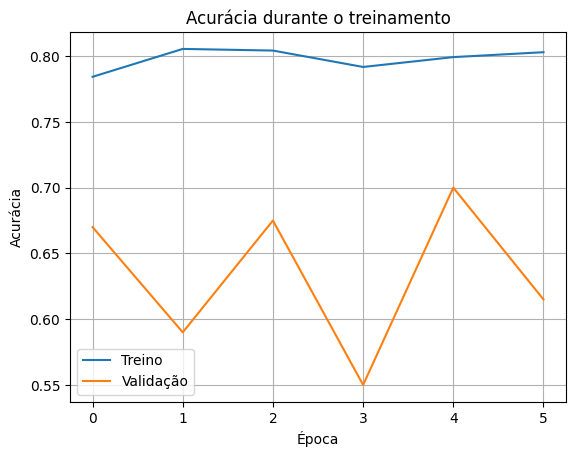

In [106]:
history = classifier.fit(
    training_set,
    validation_data=validation_set,  # adiciona validação
    epochs=12,
    callbacks=[early_stopping],
    steps_per_epoch=len(training_set),  # usa tamanho real do dataset
    validation_steps=len(validation_set)  # idem para validação
)

plt.plot(history.history['accuracy'], label='Treino')
plt.plot(history.history['val_accuracy'], label='Validação')
plt.title('Acurácia durante o treinamento')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend()
plt.grid()
plt.show()

Treinamento concluído com sucesso! 💪 Observe se ao final de cada época a acurácia aumenta.

**Teste do Modelo**

Testar o modelo treinado com imagens que ele ainda não viu. Por fim, verificamos o resultado da previsão e emitimos a informação se a imagem é de um gato ou cachorro.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Previsão: Gato.
Acurácia: 54.21 %.


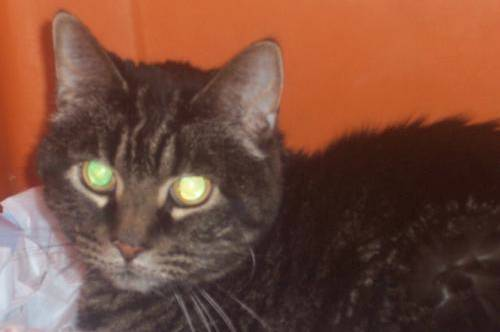

In [107]:
import numpy as np
from keras.preprocessing import image
from IPython.display import Image

# Carregando a imagem de teste
test_image = image.load_img('/content/drive/MyDrive/Colab Notebooks/Aula09/dataset_teste/96.jpg', target_size=(64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
test_image = test_image / 255.0  # Normalizar a imagem

# Fazendo a previsão usando o modelo classifier
result = classifier.predict(test_image)
class_indices = training_set.class_indices

if result[0][0] >= 0.5:
    prediction = 'Cachorro.'
    accuracy = round(result[0][0] * 100, 2)  # A saída de previsão é uma probabilidade entre 0 e 1
else:
    prediction = 'Gato.'
    accuracy = round((1 - result[0][0]) * 100, 2)  # A saída de previsão é uma probabilidade entre 0 e 1

# Exibindo a previsão e a acurácia
print("Previsão:", prediction)
print("Acurácia:", accuracy, "%.")

# Exibindo a imagem
Image(filename='/content/drive/MyDrive/Colab Notebooks/Aula09/dataset_teste/96.jpg')


In [108]:
import matplotlib.pyplot as plt

**O modelo recebeu uma imagem que nunca tinha visto antes e com base no que aprendeu durante o treinamento, foi capaz de classificar.**

Convertemos a imagem de teste em um vetor de pixels e apresentamos ao modelo.
O modelo compara o vetor da imagem de teste com seus pesos e então emite a classificação.

Found 200 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 149ms/step


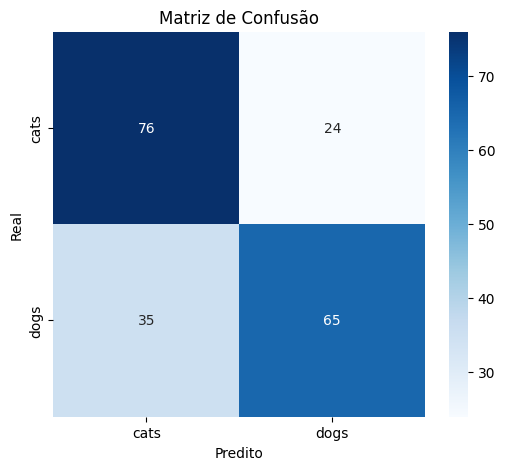

              precision    recall  f1-score   support

        cats       0.68      0.76      0.72       100
        dogs       0.73      0.65      0.69       100

    accuracy                           0.70       200
   macro avg       0.71      0.71      0.70       200
weighted avg       0.71      0.70      0.70       200



In [109]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

validation_set = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Colab Notebooks/Aula09/dataset_treino',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary',
    subset='validation',
    shuffle=False
)

# Gerar previsões com o conjunto de validação
Y_pred = classifier.predict(validation_set)
y_pred = np.where(Y_pred > 0.5, 1, 0)

# Obter rótulos verdadeiros
y_true = validation_set.classes

# Matriz de confusão
cm = confusion_matrix(y_true, y_pred)
labels = list(validation_set.class_indices.keys())

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=labels, yticklabels=labels, cmap="Blues")
plt.xlabel("Predito")
plt.ylabel("Real")
plt.title("Matriz de Confusão")
plt.show()

# Relatório de classificação
print(classification_report(y_true, y_pred, target_names=labels))

In [110]:
# Salvar
classifier.save('modelo_cachorros_gatos.keras')

# Carregar
from tensorflow.keras.models import load_model
modelo_carregado = load_model('modelo_cachorros_gatos.keras')


### Carregando e classificando várias imagens do teste

In [111]:
import os

folder = '/content/drive/MyDrive/Colab Notebooks/Aula09/dataset_teste'
for img_name in os.listdir(folder):
    img = load_img(os.path.join(folder, img_name), target_size=(64, 64))
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    pred = classifier.predict(img_array)
    label = 'Dog' if pred > 0.5 else 'Cat'
    print(f'{img_name}: {label}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
200.jpg: Cat
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
193.jpg: Cat
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
194.jpg: Cat
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
195.jpg: Dog
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
135.jpg: Cat
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
192.jpg: Cat
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
190.jpg: Dog
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
186.jpg: Cat
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
191.jpg: Cat
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
199.jpg: Dog
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
120.jpg: Dog
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
154.jpg: Cat
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
145.jpg: Cat
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
143.jpg: Dog
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
142.jpg: Cat
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
187.jpg: Cat
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
176.jpg: Dog
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
182.jpg: Dog
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
189.jpg: Dog
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28m

### Gráfico de precição

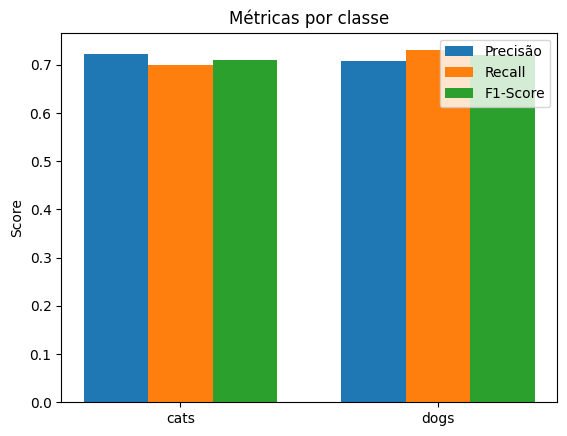

In [104]:
from sklearn.metrics import precision_score, recall_score, f1_score

prec = precision_score(y_true, y_pred, average=None)
rec = recall_score(y_true, y_pred, average=None)
f1 = f1_score(y_true, y_pred, average=None)

x = np.arange(len(labels))
width = 0.25

plt.bar(x - width, prec, width, label='Precisão')
plt.bar(x, rec, width, label='Recall')
plt.bar(x + width, f1, width, label='F1-Score')
plt.xticks(x, labels)
plt.ylabel('Score')
plt.title('Métricas por classe')
plt.legend()
plt.show()


*Melhorias adicionais para este modelo:*

Aumentar o número de épocas para 25 para uma aprendizagem mais profunda.
aumentar o redimensionamento da imagem de 64x64 para 256x256.

Aumentar o tamanho do lote de 32 para 64.

Alterar a arquitetura da rede incluindo mais uma camada convolucional.

Avaliar outras métricas do modelo e ajustar os hiperparâmetros de acordo.

Experimentar outros algoritmos de otimização.